## ICG Advisors Take Home Assignment
### By - Ameya Shete

### Introduction

In this report, we will conduct an in-depth Brinson attribution analysis of the Kopernik Global All Cap Fund (KGGIX). We find that this fund has an arithmetic equity return attribution of 0.5615%. After digging deeper into the fund using the Brinson Attribution Analysis, we find that on face value, the Materials and Communications Services sectors have performed the best while the Real Estate and Financials sectors performed the most poorly. Upon closer examination using the weightings of the portfolio, we find that the Health Care and Energy sectors perform the best for the allocational notional returns while the Information Technology and Financials sectors perform the best for the selection notional returns. We also take a look at the country wise allocation within the portfolio and find that the United States country allocations have performed the best. We also conduct a Factor Model Return Atrribution and find some odd yet interesting results as we find that the portfolio manager's investment style is large cap growth or large cap neutral investment styles. 


The Kopernik website states that the benchmark fund for KGGIX is MSCI ACWI but access to the holdings of this data and its historical values are not accessible on Bloomberg or Yahoo Finance. Thus, a workaround was made wherein the iShares MSCI ACWI ETF (ACWI) was used as a benchmark. It is important to note that while the sectors of ACWI and KGGIX are the same, the underlying constituents are different. 

The report follows the following structure: 
1) Problem Statement and data loading

2) Data Visualization of sectors and individual securities

3) Arithmetic Equity Return Attribution

4) Brinson - Hood - Beebower Model

5) Brinson - Hood - Beebower Model for Country Allocation

6) Factor Models in Return Attribution

7) Future Improvements

### Problem Statement:
#### Do an in-depth analysis on Kopernik Global All Cap Fund (Ticker; KGGIX). You can run Brinson Attribution on Bloomberg to support your study. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

The following dataset for the Kopernik Global All Cap Fund has been extracted from UCLA Anderson's Bloomberg terminals. Kopernick Global All-Cap Fund is an open-end fund whose objective is to provide long-term capital appreciation. The fund invests at least 80% of its net assets in equity securities of U.S. and non-U.S. companies of any size.

The 'summary_portfolio' and 'summary_benchmark' datasets contain the average weight %, total return % and contribution to return % for various sectors such as Materials, Energy, Industrials and Utilities while the 'detail_portfolio' and 'detail_benchmark' dataset contains a breakdown of the components that constitute each sector of the fund.

In [213]:
summary_portfolio = pd.read_excel("Kopernick Dataset.xlsx", sheet_name="Attribution Summary")
summary_portfolio = summary_portfolio.rename(columns={"Unnamed: 0" : "Sector"})
summary_portfolio.head()
summary_benchmark = pd.read_excel("Kopernick Dataset.xlsx", sheet_name="Benchmark Summary")
summary_portfolio.head()

,Sector,Avg % Wgt,Total Return (%),Contribution to Return (%)
0,Materials,24.00,3.87,0.91
1,Not Classified,16.20,-0.72,-0.12
2,Energy,13.06,-1.66,-0.22
3,Industrials,11.27,0.35,0.04
4,Utilities,8.77,-0.73,-0.06


In [214]:
detail_portfolio = pd.read_excel("Kopernick Dataset.xlsx", sheet_name="Attribution Detail")
detail_benchmark = pd.read_excel("Kopernick Dataset.xlsx", sheet_name="Benchmark Detail")
detail_portfolio.head()

,Industry,Company,Avg % Wgt,Total Return (%),Contribution to Return (%)
0,Materials,NEWCREST MINING LTD,4.35,4.92,0.21
1,Materials,WHEATON PRECIOUS METALS CORP,2.43,3.21,0.08
2,Materials,EQUINOX GOLD CORP,1.91,7.70,0.14
3,Materials,SEABRIDGE GOLD INC,1.59,4.03,0.06
4,Materials,HARMONY GOLD MNG-SPON ADR,1.33,10.73,0.14


### Data Visualization

####  Data Visualization by Sector

Before conducting the Brinson Attribution analysis, let's first visualize our datasets to understand the security and sector allocation of the portfolio. 

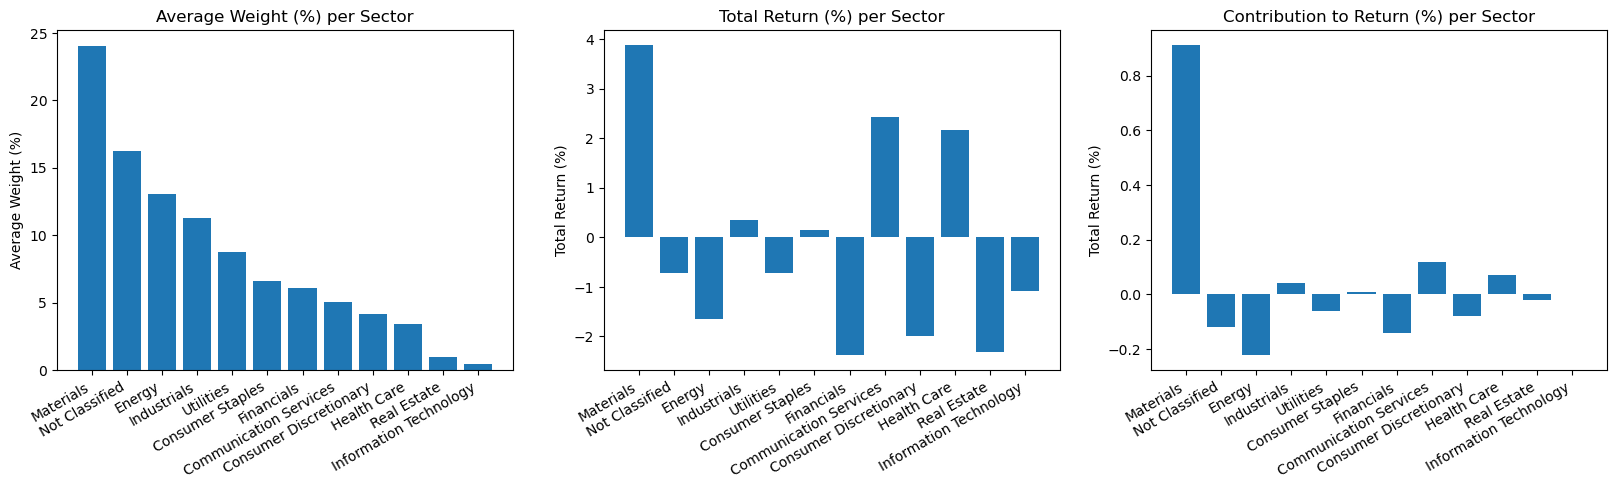

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.bar(summary_portfolio['Sector'], summary_portfolio['Avg % Wgt'])
fig.autofmt_xdate()
ax1.set_ylabel("Average Weight (%)")
ax1.set_title("Average Weight (%) per Sector")

ax2.bar(summary_portfolio['Sector'], summary_portfolio['Total Return (%)'])
fig.autofmt_xdate()
ax2.set_ylabel("Total Return (%)")
ax2.set_title("Total Return (%) per Sector")

ax3.bar(summary_portfolio['Sector'], summary_portfolio['Contribution to Return (%)'])
fig.autofmt_xdate()
ax3.set_ylabel("Total Return (%)")
ax3.set_title("Contribution to Return (%) per Sector")

plt.gcf().set_size_inches(20, 5)

##### Analysis

We see here that the Materials sector is the highest contributor to return at 0.91% with the Communication Services sector being the second highest contributor to return. This is unsurprising since we see in the "Total Return (%) per sector" bar chart that the Materials and Communication Services sectors have the highest total return. Furthermore, Materials sector is perhaps the highest contributor to return since it also has the highest weight in the portfolio. It is interesting to see that though the Contribution sector is weighted on the lower end of the portfolio, the fact that it is the second highest contributor to returns suggests that one of the constituents contributed to high returns.


We see that some of the sectors make negative contributions to the portfolio returns with the Real Estate and Financials sectors contributing to negative returns in the portfolio with -0.22 % and -0.14% respectively. Again, we see from the "Total Return (%) per sector" bar chart that these two sectors have the highest negative total returns so it's natural that we see these sectors contributing to the greatest losses in the portfolio. 


We will explore this more later below when we conduct data visualization for each security. 

#### Data Visualization by individual security

Due to the high number of individual securities in the KGGIX fund, we will visualize the data for the top 10 securities by weight. This is so that we can dissect how each individual security contributes to the total return and contribution to return for the highest weighted sectors. 

In [7]:
sorted_by_wgt = detail_portfolio.sort_values(by='Avg % Wgt', ascending=False)[0:11]

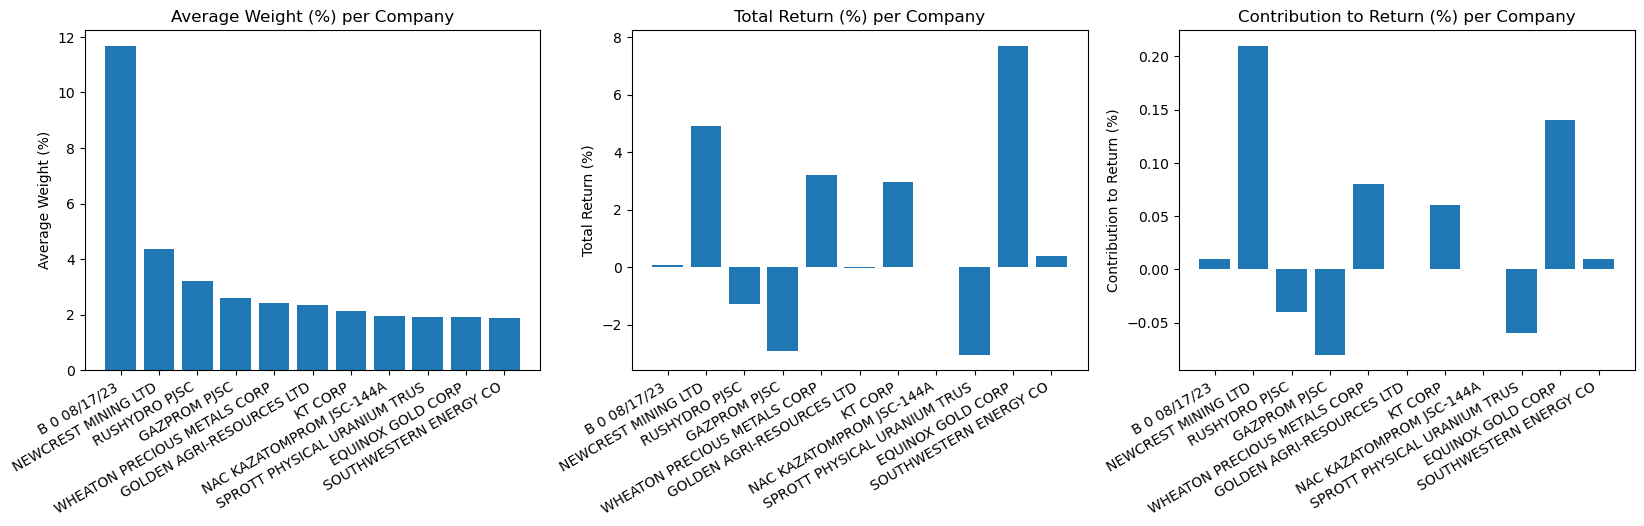

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.bar(sorted_by_wgt['Company'], sorted_by_wgt['Avg % Wgt'])
fig.autofmt_xdate()
ax1.set_ylabel("Average Weight (%)")
ax1.set_title("Average Weight (%) per Company")

ax2.bar(sorted_by_wgt['Company'], sorted_by_wgt['Total Return (%)'])
fig.autofmt_xdate()
ax2.set_ylabel("Total Return (%)")
ax2.set_title("Total Return (%) per Company")

ax3.bar(sorted_by_wgt['Company'], sorted_by_wgt['Contribution to Return (%)'])
fig.autofmt_xdate()
ax3.set_ylabel("Contribution to Return (%)")
ax3.set_title("Contribution to Return (%) per Company")

plt.gcf().set_size_inches(20, 5)

##### Analysis

Interestingly, the largest individual holding in the KGGIX fund is B 0 08/17/23 which is a treasury bill with an average weight of 11.66 %. Furthermore, we also note from the contribution to return and average weight graphs that even though B 0 08/17/23 has the highest weight in the portfolio at 11.66 %, it is only making a contribution to return of 0.01%. Newcrest Mining Ltd has the second highest weight at 4.35% but makes the biggest contribution to portfolio return at 0.21%. This could be because the we are holding a large weight in the bond to diversify our risk while the stocks will make the largest contributions to return. 

In [219]:
interesting_securities = detail_portfolio[(detail_portfolio['Industry'] == 'Materials')|
                 (detail_portfolio['Industry'] == 'Communication Services')|
                 (detail_portfolio['Industry'] == 'Real Estate') | 
                 (detail_portfolio['Industry'] == 'Financials')]
interesting_securities

,Industry,Company,Avg % Wgt,Total Return (%),Contribution to Return (%)
0,Materials,NEWCREST MINING LTD,4.35,4.92,0.21
1,Materials,WHEATON PRECIOUS METALS CORP,2.43,3.21,0.08
2,Materials,EQUINOX GOLD CORP,1.91,7.70,0.14
3,Materials,SEABRIDGE GOLD INC,1.59,4.03,0.06
4,Materials,HARMONY GOLD MNG-SPON ADR,1.33,10.73,0.14
5,Materials,ROYAL GOLD INC,1.28,6.62,0.08
6,Materials,PAN AMERICAN SILVER CORP,1.20,6.69,0.08
7,Materials,GOLD FIELDS LTD,1.04,9.13,0.09
8,Materials,IAMGOLD CORP,1.01,6.99,0.07
9,Materials,IMPALA PLATINUM HOLDINGS LTD,0.95,-5.05,-0.05


##### Analysis

We see from the data table above that Gold Mining from the Materials industry has the highest total return (%) of 10.73% with a weight of 1.33% and KT Corp. from the Communication Services Industry has the highest total return (%) of 3.62% in the sector.

As for the negatively contributing securities, from the Real Estate sector we see that LSR Group has the most negative return of -3.15%. From the Financials sector, Moscow Exchange has the most negative returns of -4.90%. 

It is also interesting to see that for the Materials, Real Estate and the Communication Services Industry there is a good mix of securities that have positive and negative returns so we can deduce that the portfolio manager has diversified well among these three sectors. However, for the Financials sector we see that majority of the securities have negative returns which suggests that the portfolio manager did not make good individual security selections.

### Arithmetic Equity Return Attribution

Calculate the KGGIX and benchmark return. 

In [11]:
def arithmetic_returns(df):
    weight = df['Avg % Wgt']
    returns = df['Total Return (%)']
    return np.sum((weight/100)*(returns/100))

KGGIX_returns = arithmetic_returns(summary_portfolio) * 100
benchmark_returns = arithmetic_returns(summary_benchmark) * 100
print("Excess Returns of: ", KGGIX_returns - benchmark_returns, "%")

Excess Returns of:  0.561531 %


We see that the KGGIX has an excess return compared the benchmark of 0.5615%. We now want to dissect this 0.5615% and understand what aspects allowed the manager to outperform the benchmark ETF.

### The Brinson–Hood–Beebower (BHB) Model

#### Allocation notional fund return

To identify the added value from allocation, we will calculate the return of an intermediate fund called the “allocation notional fund,” which is one step away from the benchmark portfolio and one step toward the actual portfolio. The term notional is used in this context to describe the hypothetical return that results from the portfolio manager’s allocation decisions but includes none of the selection decisions.

The formula for the allocation notional fund is:

$A_i = \sum_{i=1}^{i=n}(w_i - W_i)B_i$

In [12]:
def allocation_return(portfolio, benchmark):
    portfolio_weights = portfolio['Avg % Wgt']
    benchmark_returns = benchmark['Total Return (%)']
    return np.sum((portfolio_weights/100)*(benchmark_returns/100)) * 100

allocation_notional_fund_return = allocation_return(summary_portfolio, summary_benchmark)
print("Allocation notional fund return: ", allocation_notional_fund_return, "%")

Allocation notional fund return:  -0.06594399999999995 %


Contribution from asset allocation:

In [13]:
contr_asset_alloc = allocation_notional_fund_return - benchmark_returns
print("Contribution from asset allocation: ", contr_asset_alloc, "%")

Contribution from asset allocation:  -0.02563400000000001 %


We can now dissect the contribution to asset allocation for each sector and see how the manager has performed in weighting each industry.

In [81]:
allocation_list = []
portfolio_sectors = list(summary_portfolio['Sector'])
diff_of_weights = []
for sector in portfolio_sectors:
    benchmark_weight = float(summary_benchmark[summary_benchmark['Sector']==sector]['Avg % Wgt'])
    benchmark_return = float(summary_benchmark[summary_benchmark['Sector']==sector]['Total Return (%)'])
    portfolio_weight = float(summary_portfolio[summary_portfolio['Sector']==sector]['Avg % Wgt'])
    allocation_list.append((portfolio_weight - benchmark_weight) * benchmark_return)
    diff_of_weights.append(portfolio_weight - benchmark_weight)

allocation_df = pd.DataFrame({'Sector': portfolio_sectors, 'Allocation': allocation_list, 
                 'Portfolio weight - Benchmark weight': diff_of_weights})
allocation_df = allocation_df.sort_values(by='Allocation', ascending=False)
allocation_df

,Sector,Allocation,Portfolio weight - Benchmark weight
11,Information Technology,26.9205,-19.65
2,Energy,22.9017,7.87
8,Consumer Discretionary,16.5060,-6.55
4,Utilities,15.0414,5.83
10,Real Estate,0.1490,-1.49
1,Not Classified,0.0000,15.74
5,Consumer Staples,-1.2317,-1.13
6,Financials,-2.0746,-9.43
3,Industrials,-2.6985,1.05
7,Communication Services,-4.1418,-2.34


##### Analysis:

We can see from the data table above that all of the sectors are given a weight that is different from the weight in the benchmark portfolio. We see that the portfolio manager underweighted the Information Technology sector comparatively to the benchmark but has still contributed the most to the allocation returns. At the other end of the spectrum, we see that the Health Care industry has performed the most poorly with an allocation return of -25.95%. The portfolio manager has also underweighted the Health Care sector compared to the benchmark by 8.98%. Interestingly, we see that the Not Classified sector, which consists of currencies, treasury bills and commodities, has achieved allocation returns of 0.0% even though the portfolio has overwighted this sector compared to the benchmark portfolio.

#### Selection notional fund

To identify the added value from selection, we will calculate the return of a different intermediate fund called the “selection notional fund,” which is also one step away from the benchmark return but isolates a different decision of the portfolio manager in the investment decision process. In the selection notional fund, the sector weights of the benchmark are maintained and applied to the sector returns achieved by the portfolio manager.

The formula for selection notional fund is:

$S_i = \sum_{i=1}^{i=n}W_i(R_i - B_i)$

In [15]:
def selection_return(portfolio, benchmark):
    benchmark_weight = benchmark['Avg % Wgt']
    portfolio_return = portfolio['Total Return (%)']
    return np.sum((benchmark_weight/100)*(portfolio_return/100))*100
selection_notional_return = selection_return(summary_portfolio, summary_benchmark)
print("Selection notional fund return: ", selection_notional_return, "%")

Selection notional fund return:  0.29068799999999995 %


Contribution from selection:

In [16]:
contr_selection = selection_notional_return - benchmark_returns
print("Contribution from selection: ", contr_selection, "%")

Contribution from selection:  0.3309979999999999 %


In [17]:
selection_list = []
portfolio_sectors = list(summary_portfolio['Sector'])
diff_of_returns = []
for sector in portfolio_sectors:
    portfolio_returns = float(summary_portfolio[summary_portfolio['Sector']==sector]['Total Return (%)'])
    benchmark_returns = float(summary_benchmark[summary_benchmark['Sector']==sector]['Total Return (%)'])
    benchmark_weight = float(summary_benchmark[summary_benchmark['Sector']==sector]['Avg % Wgt'])
    selection_list.append((portfolio_weight - benchmark_weight) * benchmark_return)
    diff_of_returns.append(portfolio_weight - benchmark_weight)

selection_df = pd.DataFrame({'Sector': portfolio_sectors, 'Selection': selection_list, 
                 'Portfolio return - Benchmark return': diff_of_returns})
selection_df = selection_df.sort_values(by='Selection', ascending=False)
selection_df

,Sector,Selection,Portfolio return - Benchmark return
11,Information Technology,26.9205,-19.65
6,Financials,20.6733,-15.09
9,Health Care,16.3578,-11.94
8,Consumer Discretionary,14.0973,-10.29
3,Industrials,13.3986,-9.78
5,Consumer Staples,10.0147,-7.31
7,Communication Services,9.4667,-6.91
2,Energy,6.5075,-4.75
0,Materials,6.1376,-4.48
4,Utilities,3.4250,-2.50


##### Analysis:

At first glance, it is interesting to see that none of the selection notional returns are negative, they are all positive with the highest selection notional returns being equal to the allocation notional funds at 26.9205%. On the lower end, the lowest selection notional fund is 0.0274% for the Not Classified sector. Since we have no negative selection notional returns, we follow the definition of selection notional returns to deduce that the portfolio manager's individual selection decisions have yielded positive results since they all contributed positively to portfolio excess returns.

#### Interaction term

In the BHB model, the selection and allocation don't explain the arithmetic difference completely. Therefore, we must account for the interaction term to account for the arithmetic difference completely.

In [18]:
interaction = contr_selection + contr_asset_alloc
print("Interaction term: ", interaction, "%")

Interaction term:  0.3053639999999999 %


We can also measure the individual sectoral interaction terms as the following:

In [19]:
interaction_list = []
portfolio_sectors = list(summary_portfolio['Sector'])
for sector in portfolio_sectors:
    portfolio_weight = float(summary_portfolio[summary_portfolio['Sector']==sector]['Avg % Wgt'])
    portfolio_returns = float(summary_portfolio[summary_portfolio['Sector']==sector]['Total Return (%)'])
    benchmark_weight = float(summary_benchmark[summary_benchmark['Sector']==sector]['Avg % Wgt'])
    benchmark_returns = float(summary_benchmark[summary_benchmark['Sector']==sector]['Total Return (%)'])
    interaction = (portfolio_weight * portfolio_returns) - (benchmark_weight * portfolio_returns) - (portfolio_weight * benchmark_returns) + (benchmark_weight * benchmark_returns)
    interaction_list.append(interaction)
interaction_df = pd.DataFrame({'Sector': portfolio_sectors, 'Interaction': interaction_list})
interaction_df

,Sector,Interaction
0,Materials,98.2620
1,Not Classified,-11.3328
2,Energy,-35.9659
3,Industrials,3.0660
4,Utilities,-19.2973
5,Consumer Staples,1.0622
6,Financials,24.4237
7,Communication Services,-1.5444
8,Consumer Discretionary,-3.4715
9,Health Care,6.5554


In [231]:
print("Total Interaction: ", np.sum(interaction_df['Interaction']/100), "%")

Total Interaction:  0.5935179999999997 %


##### Analysis:

We see that the overall interaction term for this portfolio is relatively small. If we dissect the interaction dataframe to understand the sum of the selection and allocation notional funds, we find that the Materials sector is the highest with an interaction term of 98.262% while being underweight compared to the benchmark by 19.65%. Overall, we can conclude that the portfolio manager has made the best weighting decisions in the Materials sector. 

The Energy sector, comparatively, has the highest negative interaction term despite the portfolio manager underweighting the Energy sector by 4.75%. We can thus conclude that the portfolio manager has made poor weighting choices in the underlying Energy securities.

### Brinson Attribution Analysis for Country Allocation

In this section, we will drill down to another level and study the portfolio manager's country allocation process for each sector. 

#### Data Cleaning

In [221]:
portfolio_country = pd.read_excel("Country Allocation.xlsx", sheet_name="Portfolio")
benchmark_country = pd.read_excel("Country Allocation.xlsx", sheet_name="Benchmark")
portfolio_country

,Sector,Company,Currency
0,Communication Services,LG UPLUS CORP,KRW
1,Communication Services,KT CORP-SP ADR,USD
2,Communication Services,KT CORP,KRW
3,Consumer Discretionary,TACHI-S CO LTD,JPY
4,Consumer Discretionary,SABRE CORP,USD
...,...,...,...
121,Not Classified,EURO,EUR
122,Not Classified,DREYFUS TR SEC CSH MGMT-PRT,USD
123,Not Classified,CANADIAN DOLLAR,CAD
124,Not Classified,B 0 08/17/23,USD


In [222]:
port_ccy_list = []
benchmark_ccy_list = []
for i in list(detail_portfolio['Company']):
    ccy_port = portfolio_country[portfolio_country['Company']==i][['Currency']].iloc[0,0]
    port_ccy_list.append(ccy_port)
    
for i in list(detail_benchmark['Company']):
    if i in list(benchmark_country['Company']):
        ccy_benchmark = benchmark_country[benchmark_country['Company']==i][['Currency']].iloc[0,0]
        benchmark_ccy_list.append(ccy_benchmark)
    else:
        detail_benchmark = detail_benchmark.drop(labels=detail_benchmark[detail_benchmark['Company']==i].index.values[0], axis=0)

detail_portfolio['Currency'] = port_ccy_list
detail_benchmark['Currency'] = benchmark_ccy_list

In [223]:
portfolio_ccy = list(np.unique(portfolio_country['Currency']))
portfolio_ccy

['AUD',
 'BRL',
 'CAD',
 'EUR',
 'GBP',
 'HKD',
 'JPY',
 'KRW',
 'LKR',
 'MYR',
 'NOK',
 'PLN',
 'RUB',
 'SGD',
 'THB',
 'USD',
 'ZAR']

In [224]:
country_dict = {'AUD':'Australia', 'BRL':'Brazil', 'CAD':'Canada', 'EUR':'Eurozone', 'GBP':'Britain', 
                'HKD':'Hong Kong', 'JPY':'Japan', 'KRW':'South Korea', 'LKR':'Sri Lanka', 'MYR':'Malaysia',
               'NOK':'Norway', 'PLN':'Poland', 'RUB':'Russia', 'SGD':'Singapore', 'THB':'Thailand', 
                'USD':'Unted States', 'ZAR':'South Africa'}

In [225]:
port_ccy_weight = []
bench_ccy_weight = []
for i in portfolio_ccy:
    port_weight = np.sum(detail_portfolio[detail_portfolio['Currency']==i]['Avg % Wgt'])/100
    bench_weight = np.sum(detail_benchmark[detail_benchmark['Currency']==i]['Avg % Wgt'])/100
    
    port_ccy_weight.append(port_weight)
    bench_ccy_weight.append(bench_weight)

port_ccy_return = []
bench_ccy_return = []
for i in portfolio_ccy:
    port_return = np.sum((detail_portfolio[detail_portfolio['Currency']==i]['Avg % Wgt'])/100 * (detail_portfolio[detail_portfolio['Currency']==i]['Total Return (%)'])/100)
    port_ccy_return.append(port_return)
    
    bench_return = np.sum((detail_benchmark[detail_benchmark['Currency']==i]['Avg % Wgt'])/100 * (detail_benchmark[detail_benchmark['Currency']==i]['Total Return (%)']/100))
    bench_ccy_return.append(bench_return)

In [226]:
allocation_ccy_list = []
selection_ccy_list = []
for i in range(len(port_ccy_weight)):
    allocation_ccy = (port_ccy_weight[i] - bench_ccy_weight[i]) * bench_ccy_return[i]
    allocation_ccy_list.append(allocation_ccy)

for i in range(len(bench_ccy_weight)):
    selection_ccy = (port_ccy_return[i] - bench_ccy_return[i]) * bench_ccy_weight[i]
    selection_ccy_list.append(selection_ccy)

In [227]:
countries = [country_dict[i] for i in portfolio_ccy]
country_df = pd.DataFrame({'Country': countries, 'Portfolio Weight': port_ccy_weight, 
                          'Benchmark Weight': bench_ccy_weight, 'Portfolio Return':port_ccy_return, 
                          'Benchmark Return': bench_ccy_return, 'Allocation': allocation_ccy_list, 
                          'Selection':selection_ccy_list})
country_df

,Country,Portfolio Weight,Benchmark Weight,Portfolio Return,Benchmark Return,Allocation,Selection
0,Australia,0.0435,0.0193,0.002140,0.000022,5.210260e-07,4.089033e-05
1,Brazil,0.0190,0.0051,-0.000063,-0.000024,-3.361020e-07,-1.981860e-07
2,Canada,0.1892,0.0300,0.003248,0.000256,4.076634e-05,8.975760e-05
3,Eurozone,0.0078,0.0833,-0.000109,0.000410,-3.095651e-05,-4.320604e-05
4,Britain,0.0095,0.0386,-0.000132,0.000858,-2.496402e-05,-3.821091e-05
5,Hong Kong,0.0700,0.0320,0.001002,-0.000266,-1.009812e-05,4.057632e-05
6,Japan,0.0828,0.0554,0.000867,-0.000643,-1.763026e-05,8.366231e-05
7,South Korea,0.1182,0.0126,-0.000730,-0.000077,-8.137536e-06,-8.231958e-06
8,Sri Lanka,0.0015,0.0000,0.000024,0.000000,0.000000e+00,0.000000e+00
9,Malaysia,0.0024,0.0015,0.000017,0.000015,1.324800e-08,3.120000e-09


In [229]:
print("Country allocation total: ", np.sum(country_df['Allocation']), "%")
print("Country selection total: ", np.sum(country_df['Selection']), "%")

Country allocation total:  0.0003268654220000002 %
Country selection total:  0.0019407255960000006 %


##### Analysis

From the country specific attribution analysis, we see that both the allocation and selection notional returns are positive. We can deduce from this this that the portfolio manager has made good country allocations and good security selections within countries. We see that United States has yielded the highest allocation and selection notional returns.

### Factor Models in Return Attribution

In our return attribution analysis of KGGIX, we have analyzed the Brinson-Hood-Beebower Model which focuses on security selection, asset allocation and the interaction term between these factors. Now, we will switch gears beyond the scope of these parameters and dig deeper into the fundamental factor models to decompose the relative contributors to excess return of a number of different factors. This fundamental factor analysis will allow us to quantify the impact of of specific active investment decisions within the portfolio and show us how they add or remove value relative to the benchmark. We want to remove effects of the market in an effort to identify the excess return generated by active investment decisions. 

In [288]:
daily_prices = pd.read_csv("KGGIX.csv")
daily_prices = daily_prices[daily_prices['Date']<='2023-02-01']
daily_prices.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
106,2022-10-01,11.54,11.85,11.11,11.52,10.131935,0
107,2022-11-01,11.64,12.92,11.37,12.92,11.363247,0
108,2022-12-01,12.99,12.99,11.14,11.16,9.815311,0
109,2023-01-01,11.14,12.02,11.14,11.86,11.860000,0
110,2023-02-01,11.98,11.98,11.23,11.27,11.270000,0


In [289]:
benchmark_daily_prices = pd.read_csv("ACWI.csv")
benchmark_daily_prices = benchmark_daily_prices[(benchmark_daily_prices['Date']>='2013-12-01') & ((benchmark_daily_prices['Date']<='2023-02-01'))].reset_index()
benchmark_daily_prices = benchmark_daily_prices.drop(columns='index')
benchmark_daily_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-01,56.869999,57.680000,54.959999,57.619999,47.461494,39988000
1,2014-01-01,57.189999,57.459999,54.570000,54.950001,45.637543,27800600
2,2014-02-01,54.970001,58.090000,53.730000,57.810001,48.012856,24922900
3,2014-03-01,57.160000,58.480000,56.450001,58.139999,48.286938,26373400
4,2014-04-01,58.299999,58.919998,56.709999,58.830002,48.860004,21717500


In [290]:
fama_french_data = pd.read_csv("F-F_Research_Data_Factors.CSV")
fama_french_data = fama_french_data.rename(columns={'Unnamed: 0': 'Date'})
fama_french_data = fama_french_data[fama_french_data['Date']>=201312].reset_index()
fama_french_data = fama_french_data.drop(columns='index')
fama_french_data.head()

,Date,Mkt-RF,SMB,HML,RF
0,201312,2.81,-0.45,-0.02,0.0
1,201401,-3.32,0.90,-2.07,0.0
2,201402,4.65,0.37,-0.31,0.0
3,201403,0.43,-1.85,4.93,0.0
4,201404,-0.19,-4.20,1.17,0.0


In [291]:
len(fama_french_data) == len(daily_prices)

True

##### Methodology

We want to conduct a Factor Model Linear Regression using the Fama French factors. In order to do this, we must ensure that there are an equal number of rows for both datasets. Thus, we use data points in between the dates December 2013 and February 2023. This starting point is chosen because the KGGIX fund was started in December 2013 and the latest Fama French factors only extend until February 2023. 

To remove the market effects, we need to calculate the excess return. Ideally, we would have used the MSCI ACWI portfolio as the benchmark to measure the excess returns but since this data is not available on Bloomberg or Yahoo Finance, we will resort to using the risk free rate. Excess returns are then defined as:

Excess Return = $R - R_f$

In [293]:
fama_french_data['Portfolio Monthly Prices'] = daily_prices['Close']
fama_french_data['Benchmark Monthly Prices'] = benchmark_daily_prices['Close']

fama_french_data['Portfolio Excess Returns'] = fama_french_data['Portfolio Monthly Prices'] - fama_french_data['RF']
fama_french_data['Portfolio Excess Returns'] = (fama_french_data['Portfolio Excess Returns'].pct_change(1))*100

fama_french_data['Benchmark Excess Returns'] = fama_french_data['Benchmark Monthly Prices'] - fama_french_data['RF']
fama_french_data['Benchmark Excess Returns'] = (fama_french_data['Benchmark Excess Returns'].pct_change(1))*100

fama_french_data = fama_french_data[1:]
fama_french_data.head()

,Date,Mkt-RF,SMB,HML,RF,Portfolio Monthly Prices,Benchmark Monthly Prices,Portfolio Excess Returns,Benchmark Excess Returns
2,201402,4.65,0.37,-0.31,0.0,10.40,57.810001,4.627767,5.204731
3,201403,0.43,-1.85,4.93,0.0,10.14,58.139999,-2.500000,0.570832
4,201404,-0.19,-4.20,1.17,0.0,10.10,58.830002,-0.394477,1.186796
5,201405,2.06,-1.88,-0.13,0.0,10.04,60.009998,-0.594059,2.005772
6,201406,2.61,3.08,-0.70,0.0,10.62,60.259998,5.776892,0.416597


Before running our regressions, let's visualize the portfolio against each of the fundamental factors.

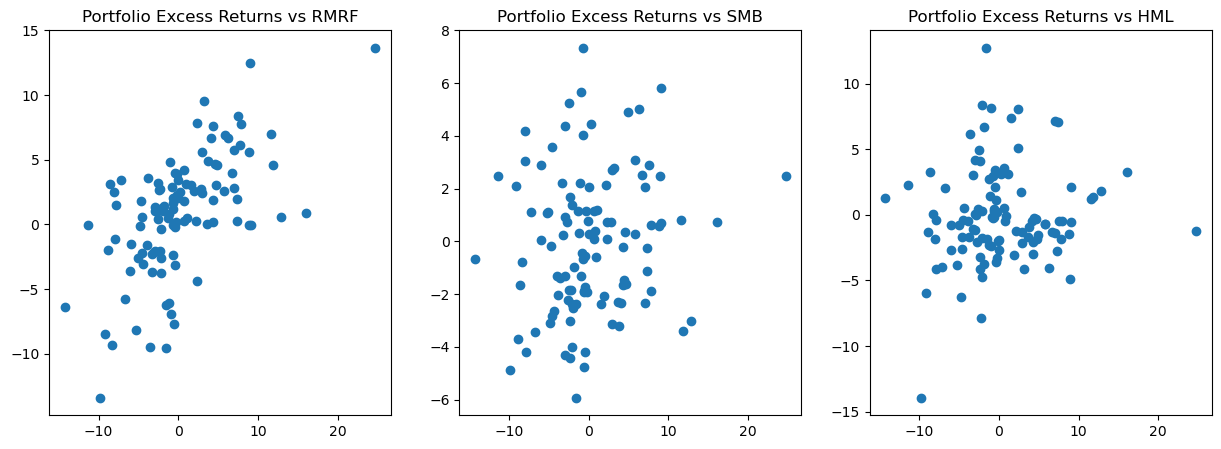

In [294]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.scatter(fama_french_data['Portfolio Excess Returns'], fama_french_data['Mkt-RF'])
ax1.set_title("Portfolio Excess Returns vs RMRF")

ax2.scatter(fama_french_data['Portfolio Excess Returns'], fama_french_data['SMB'])
ax2.set_title("Portfolio Excess Returns vs SMB")

ax3.scatter(fama_french_data['Portfolio Excess Returns'], fama_french_data['HML'])
ax3.set_title("Portfolio Excess Returns vs HML")
plt.gcf().set_size_inches(15, 5)

##### Comments

It is interesting to see that none of these graphs exhibit heteroscedasticity. Thus, we can continue to use nonrobust standard errors in our Ordinary Least Squares regression.

We will conduct two separate regressions - one for the portfolio and another one for the benchmark. This will give us information for how the portfolio and the benchmark have performed relative to the market as whole.

The Fama French regression takes the form:

$R_p - R_f = \alpha + \beta_{mkt} RMRF + \beta_S SMB + \beta_V HML$

In [295]:
lm = sm.OLS(fama_french_data['Portfolio Excess Returns'], fama_french_data[['Mkt-RF', 'SMB', 'HML']]).fit()
print(lm.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Portfolio Excess Returns   R-squared (uncentered):                   0.366
Model:                                  OLS   Adj. R-squared (uncentered):              0.349
Method:                       Least Squares   F-statistic:                              20.44
Date:                      Fri, 14 Apr 2023   Prob (F-statistic):                    1.58e-10
Time:                              13:10:18   Log-Likelihood:                         -323.82
No. Observations:                       109   AIC:                                      653.6
Df Residuals:                           106   BIC:                                      661.7
Df Model:                                 3                                                  
Covariance Type:                  nonrobust                                                  
                 coef    std err          t      P>|t|      

In [296]:
lm_benchmark = sm.OLS(fama_french_data['Benchmark Excess Returns'], fama_french_data[['Mkt-RF', 'SMB', 'HML']]).fit()
print(lm_benchmark.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Benchmark Excess Returns   R-squared (uncentered):                   0.938
Model:                                  OLS   Adj. R-squared (uncentered):              0.936
Method:                       Least Squares   F-statistic:                              532.7
Date:                      Fri, 14 Apr 2023   Prob (F-statistic):                    9.46e-64
Time:                              13:10:22   Log-Likelihood:                         -162.44
No. Observations:                       109   AIC:                                      330.9
Df Residuals:                           106   BIC:                                      339.0
Df Model:                                 3                                                  
Covariance Type:                  nonrobust                                                  
                 coef    std err          t      P>|t|      

##### Analysis

We see from the regressing the portfolio and benchmark against the Fama French factors that we have yielded very different results for each regression. Comparing the $R^2$ of both regressions, we see that that the portfolio regression gives an $R^2$ value of 0.363 while the benchmark regression gives us an $R^2$ value of 0.938. This tells us that in the benchmark regression, the independent Fama French factor models have captured the variation of benchmark returns much better than they have for the portfolio returns. 

Furthermore, we can also see that the benchmark regression yields lower AIC model than the portfolio regression with values of -678.1 and -354.0 respectively. This implies that the benchmark regression has a higher information value than that the portfolio regression. Combining the results we see in $R^2$ and AIC, we can conclude that the reason the benchmark regression yields a better result and fit using the Fama French factors is that the benchmark ETF contains many more securities in each of the industries so it is a better representation of the market as a whole. 

Looking at the standard errors of the model, we see that they are negligible for both regressions since they are very close to 0 in both cases. This allows us to conclude that in both cases, the nonrobust standard errors model is indeed ideal since heteroscedasticity does not exist. Thus, there is no need to tweak the model for robust standard errors.

Lastly, we can also conduct a p-value significance test to find that for the portfolio regression, we have high p-values suggesting that we cannot reject the null hypothesis that the dependent variables describe the independent variable. Though we will use these coefficients in the analysis that follows, we pass them over in silence. However, looking at the p-values for the benchmark regression, we see that they are statistically significant suggesting that the coefficients are different from 0.  

In [297]:
portfolio_coefs = lm.params
benchmark_coefs = lm_benchmark.params
portfolio_sensitivities = []
benchmark_sensitivities = []
for i in range(3):
    portfolio_sensitivities.append(portfolio_coefs[i])
    benchmark_sensitivities.append(benchmark_coefs[i])
diff_of_coefs = portfolio_coefs - benchmark_coefs
print(diff_of_coefs)

Mkt-RF   -0.142430
SMB       0.056517
HML       0.107384
dtype: float64


In [302]:
mkt_rf_return = (np.mean(1 + fama_french_data['Mkt-RF'])) - 1
smb_return = (np.mean(1 + fama_french_data['SMB']))-1
hml_return = (np.mean(1 + fama_french_data['HML']))-1
factor_return = [mkt_rf_return, smb_return, hml_return]

rmrf_abs_contr = diff_of_coefs[0] * mkt_rf_return
smb_abs_contr = diff_of_coefs[1] * smb_return
hml_abs_contr = diff_of_coefs[2] * hml_return
abs_contr = [rmrf_abs_contr, smb_abs_contr, hml_return]

return_due_to_factors = rmrf_abs_contr + smb_abs_contr + hml_abs_contr
print("Total factor returns: ", return_due_to_factors * 100, "%")

portfolio_excess_return = (np.mean(1 + fama_french_data['Portfolio Excess Returns'])) - 1
print("Portfolio Excess Returns: ", portfolio_excess_return * 100, "%")

return_specific_asset_allocation = portfolio_excess_return - return_due_to_factors
print("Specific Asset Allocation return: ", return_specific_asset_allocation * 100, "%")

rmrf_proportional_contr = rmrf_abs_contr/portfolio_excess_return
smb_proportional_contr = smb_abs_contr/portfolio_excess_return
hml_proportional_contr = hml_abs_contr/portfolio_excess_return

proportional_contr = [(rmrf_proportional_contr) * 100, (smb_proportional_contr) * 100, (hml_proportional_contr) * 100]

Total factor returns:  -13.962290650559597 %
Portfolio Excess Returns:  25.81133556840447 %
Specific Asset Allocation return:  39.77362621896406 %


In [299]:
regression_df = pd.DataFrame({'Portfolio sensitivity':portfolio_sensitivities, 
                              'Benchmark sensitivity':benchmark_sensitivities,
                             'Difference':diff_of_coefs, 'Factor Return':factor_return, 
                              'Absolute Contribution':abs_contr, 'Proportional Contribtion':proportional_contr})
regression_df

,Portfolio sensitivity,Benchmark sensitivity,Difference,Factor Return,Absolute Contribution,Proportional Contribtion
Mkt-RF,0.771753,0.914184,-0.142430,0.894862,-0.127456,-49.379672
SMB,-0.072739,-0.129256,0.056517,-0.064679,-0.003655,-1.416222
HML,0.158817,0.051433,0.107384,-0.079266,-0.079266,-3.297745


In [300]:
return_specific_asset_allocation = portfolio_excess_return - return_due_to_factors
print("Return attribution to specific asset allocation: ", return_specific_asset_allocation * 100, "%")
print("Proportional Contribution of specific asset allocation: ", return_specific_asset_allocation/portfolio_excess_return * 100, "%")

Return attribution to specific asset allocation:  39.77362621896406 %
Proportional Contribution of specific asset allocation:  154.0936388725687 %


##### Analysis

This analysis yields some interesting results as it gives us an insight into the portfolio manager's approach to investing in value or growth stocks (HML) as well as their approach to small vs big companies (SMB). 

When it comes to the book-to-market ratios, we see that the portfolio and the benchmark have a small but slightly higher than 0 exposure to HML suggesting that the portfolio manager prefers small cap equities than large cap equities. This indicates that the portfolio manager is attempting to create a growth portfolio. For SMB, we see negative but close to 0 sensitivities for both the portfolios and the benchmark indicating that the portfolio manager prefers large cap securities. Given these findings, we might conclude that the portfolio manager has large-cap growth or large-cap neutral investment style. 

We see that the proportional contribution of specific asset allocation is a huge 154.75% while the return attributed to specific asset allocation is 39.77%. These results are a little unusual and this could stem from the fact that when conducting our linear regression, we found that the p-values of $\beta_{SMB}$ and $\beta_{HML}$ coefficients were found to be statistically insignificant. Furthermore, since the benchmark we have used is an ETF of the true benchmark portfolio, the underlying constituents are very different which might result in our difference of coefficients, the basis of the factor model attribution analysis, to also be questionable. Though we will take these results with a grain of salt, the factor model attribution analysis still yields insightful results regarding the portfolio manager's approach to small vs large cap stocks and growth vs value companies. We see that the portfolio has yielded negative absolute contribution for SMB and HML at -0.3655% and -7.92% respectively. This allocation has hurt the performance of the fund.

### Future Improvements

While this report conducts an in-depth analysis of the KGGIX fund, there nonetheless are some improvements that can be made to this report that would ensure an even more thorough analysis. The primary reason for not being able to conduct a more thorough analysis of this fund stems from not having the adequate data to conduct this analysis. Some improvements that could be made are:

1) Comparing the portfolio and the benchmark portfolio at the security level. The benchmark portfolio holdings of MSCI ACWI were not available on Bloomberg so a workaround was formulated by using the MSCI ACWI ETF. If the correct data was available for MSCI ACWI, we would be able to conduct a more robust Fama French Regression.

2) We could also conduct a transaction-based attribution analysis if transaction level data were available for the fund. 
